In [1]:
CHALLENGES = [
    "kda",
    "killParticipation",
    "multikills",
    "turretPlatesTaken",
    "visionScoreAdvantageLaneOpponent",
    "visionScorePerMinute",
    "teamDamagePercentage",
    "controlWardsPlaced",
    "goldPerMinute",
]

PARTICIPANT_INFO = [
    "assistMePings",
    "dangerPings",
    "onMyWayPings",
    "deaths",
    "kills",
    "largestKillingSpree",
    "pentaKills",
    "quadraKills",
    "tripleKills",
    "totalDamageDealtToChampions",
    "totalDamageTaken",
    "totalHeal",
    "totalHealsOnTeammates",
    "totalTimeCCDealt",
    "visionScore",
    "wardsPlaced",
    "visionWardsBoughtInGame",
    "goldEarned",
]

In [3]:
tmp = CHALLENGES + PARTICIPANT_INFO

In [8]:
for t in tmp:
    print(f",  cs.avg{t.capitalize()} / (ls.avg{t.capitalize()} + 1e-10) AS normalize{t.capitalize()}")

,  cs.avgKda / (ls.avgKda + 1e-10) AS normalizeKda
,  cs.avgKillparticipation / (ls.avgKillparticipation + 1e-10) AS normalizeKillparticipation
,  cs.avgMultikills / (ls.avgMultikills + 1e-10) AS normalizeMultikills
,  cs.avgTurretplatestaken / (ls.avgTurretplatestaken + 1e-10) AS normalizeTurretplatestaken
,  cs.avgVisionscoreadvantagelaneopponent / (ls.avgVisionscoreadvantagelaneopponent + 1e-10) AS normalizeVisionscoreadvantagelaneopponent
,  cs.avgVisionscoreperminute / (ls.avgVisionscoreperminute + 1e-10) AS normalizeVisionscoreperminute
,  cs.avgTeamdamagepercentage / (ls.avgTeamdamagepercentage + 1e-10) AS normalizeTeamdamagepercentage
,  cs.avgControlwardsplaced / (ls.avgControlwardsplaced + 1e-10) AS normalizeControlwardsplaced
,  cs.avgGoldperminute / (ls.avgGoldperminute + 1e-10) AS normalizeGoldperminute
,  cs.avgAssistmepings / (ls.avgAssistmepings + 1e-10) AS normalizeAssistmepings
,  cs.avgDangerpings / (ls.avgDangerpings + 1e-10) AS normalizeDangerpings
,  cs.avgOnmyway

In [4]:
import pandas as pd
import datetime as dt

end_time = dt.datetime.utcnow()
start_time = end_time - dt.timedelta(7)

start_time_str = start_time.strftime("%Y-%m-%dT%H:%M:%S.%f")
end_time_str = end_time.strftime("%Y-%m-%dT%H:%M:%S.%f")
df = pd.read_gbq(
    f"""
SELECT
    ARRAY(SELECT champ FROM UNNEST(blue_team) WHERE lane="TOP")[SAFE_OFFSET(0)] AS blue_team_top
  , ARRAY(SELECT champ FROM UNNEST(blue_team) WHERE lane="JUNGLE")[SAFE_OFFSET(0)] AS blue_team_jg
  , ARRAY(SELECT champ FROM UNNEST(blue_team) WHERE lane="MIDDLE")[SAFE_OFFSET(0)] AS blue_team_mid
  , ARRAY(SELECT champ FROM UNNEST(blue_team) WHERE lane="BOTTOM")[SAFE_OFFSET(0)] AS blue_team_bot
  , ARRAY(SELECT champ FROM UNNEST(blue_team) WHERE lane="UTILITY")[SAFE_OFFSET(0)] AS blue_team_sup
  , ARRAY(SELECT champ FROM UNNEST(red_team) WHERE lane="TOP")[SAFE_OFFSET(0)] AS red_team_top
  , ARRAY(SELECT champ FROM UNNEST(red_team) WHERE lane="JUNGLE")[SAFE_OFFSET(0)] AS red_team_jg
  , ARRAY(SELECT champ FROM UNNEST(red_team) WHERE lane="MIDDLE")[SAFE_OFFSET(0)] AS red_team_mid
  , ARRAY(SELECT champ FROM UNNEST(red_team) WHERE lane="BOTTOM")[SAFE_OFFSET(0)] AS red_team_bot
  , ARRAY(SELECT champ FROM UNNEST(red_team) WHERE lane="UTILITY")[SAFE_OFFSET(0)] AS red_team_sup
  , winner
  , tier
FROM `mlops-project-391611.datawarehouse.matches`(DATETIME('{start_time_str}'), DATETIME('{end_time_str}'))
    """,
    'mlops-project-391611'
)


In [5]:
df

,blue_team_top,blue_team_jg,blue_team_mid,blue_team_bot,blue_team_sup,red_team_top,red_team_jg,red_team_mid,red_team_bot,red_team_sup,winner,tier
0,Tryndamere,Elise,Tristana,Rengar,Ivern,Rumble,Kayn,Syndra,Caitlyn,Leblanc,BLUE,GOLD
1,Garen,FiddleSticks,Ahri,Ashe,Pyke,Quinn,Rengar,Kaisa,Ezreal,Shen,BLUE,DIAMOND
2,Anivia,Viego,Talon,Kaisa,Amumu,Rumble,LeeSin,Ziggs,Khazix,Rengar,BLUE,GOLD
3,Irelia,JarvanIV,Xerath,Jinx,Thresh,Sett,Evelynn,Katarina,Ezreal,Kennen,BLUE,PLATINUM
4,Quinn,Kayn,Malzahar,Kaisa,Thresh,Mordekaiser,MasterYi,Ahri,Draven,Twitch,RED,SILVER
...,...,...,...,...,...,...,...,...,...,...,...,...
15347,Malphite,Shyvana,Viktor,Varus,Nautilus,Aatrox,Kayn,Cassiopeia,Kaisa,Heimerdinger,BLUE,PLATINUM
15348,Darius,Maokai,Qiyana,Teemo,Brand,Shyvana,JarvanIV,Akali,Kaisa,Heimerdinger,BLUE,GOLD
15349,Aatrox,Rengar,Azir,Kaisa,Swain,DrMundo,Shaco,Yasuo,Ashe,Heimerdinger,BLUE,PLATINUM
15350,Olaf,Khazix,Velkoz,Kaisa,Thresh,Fiora,Skarner,Fizz,Ezreal,Heimerdinger,BLUE,DIAMOND


In [9]:
import re
import requests
from bs4 import BeautifulSoup

req = requests.get('https://www.leagueoflegends.com/en-us/champions/')
doc = BeautifulSoup(req.content, 'html.parser')

In [12]:
for a in doc.find_all('a', href=True):
    href = a['href']
    if href.startswith('/en-us/champions/'):
        print("Found the URL:", a['href'])

Found the URL: /en-us/champions/aatrox/
Found the URL: /en-us/champions/ahri/
Found the URL: /en-us/champions/akali/
Found the URL: /en-us/champions/akshan/
Found the URL: /en-us/champions/alistar/
Found the URL: /en-us/champions/amumu/
Found the URL: /en-us/champions/anivia/
Found the URL: /en-us/champions/annie/
Found the URL: /en-us/champions/aphelios/
Found the URL: /en-us/champions/ashe/
Found the URL: /en-us/champions/aurelion-sol/
Found the URL: /en-us/champions/azir/
Found the URL: /en-us/champions/bard/
Found the URL: /en-us/champions/bel-veth/
Found the URL: /en-us/champions/blitzcrank/
Found the URL: /en-us/champions/brand/
Found the URL: /en-us/champions/braum/
Found the URL: /en-us/champions/caitlyn/
Found the URL: /en-us/champions/camille/
Found the URL: /en-us/champions/cassiopeia/
Found the URL: /en-us/champions/cho-gath/
Found the URL: /en-us/champions/corki/
Found the URL: /en-us/champions/darius/
Found the URL: /en-us/champions/diana/
Found the URL: /en-us/champions/

In [8]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [3]:
from google.cloud import bigquery
import pandas as pd
df = pd.read_gbq('SELECT * EXCEPT(lane) FROM `mlops-project-391611.datawarehouse.matches_test`', 'mlops-project-391611')

In [6]:
client = bigquery.Client('mlops-project-391611')
job_config = bigquery.LoadJobConfig(
    write_disposition="WRITE_APPEND",
    time_partitioning=bigquery.table.TimePartitioning(
        type_="DAY", field="gameStartTime"
    ),
    clustering_fields=[
            "teamPosition",
            "division",
        ],
)

table_id = f"datawarehouse.matches"
job = client.load_table_from_dataframe(
    df, table_id, job_config=job_config
)  # Make an API request
job.result()  # Wait for job to finish

/home/cemmi/anaconda3/envs/mlops-project/lib/python3.9/site-packages/google/auth/_default.py:78: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


LoadJob<project=mlops-project-391611, location=europe-west1, id=434ccab3-651e-4aac-b83e-31c3b959178a>

In [1]:
import wandb

In [38]:
wandb.init()
artifact = wandb.use_artifact("hca97/lol-match-predictor/lol-match-predictor-dataset:latest", type="preprocessed_dataset")
data_path = artifact.download()

wandb:   1 of 1 files downloaded.  


In [3]:
data_path

'./artifacts/lol-match-predictor-dataset:v0'

In [4]:
import pickle, os
def load_pickle(filename: str):
    with open(filename, "rb") as f_in:
        return pickle.load(f_in)

X_train, y_train, X_test, y_test = load_pickle(os.path.join(data_path, "07-19-2023-07-24-2023.pkl"))

In [5]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
config = {"n_jobs": -1, "max_depth": 5, "n_estimators": 5}
rfc = RandomForestClassifier(**config)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, n_jobs=-1)

In [33]:
rfc.feature_importances_.shape

(1934,)

In [34]:
import time

import numpy as np

forest = rfc
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


In [35]:
idx = np.argsort(importances)[::-1]

In [36]:
i

array([1761, 1732, 1645, 1703, 1906, 1877, 1790, 1674, 1819, 1849, 1791,
       1646, 1907, 1882, 1820, 1658, 1931, 1878, 1770, 1651])

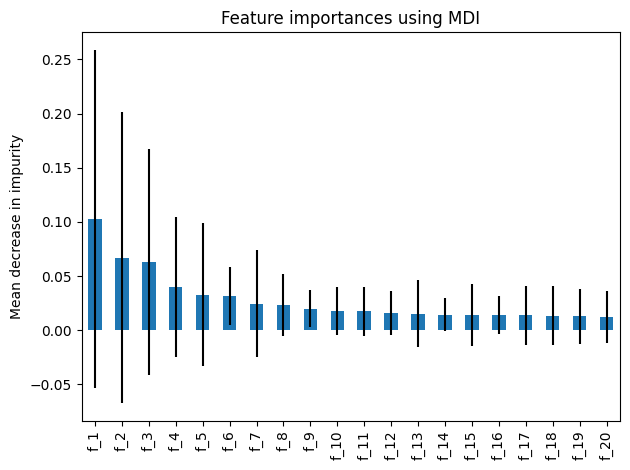

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 20
i = idx[:n]
feature_names = [f'f_{i}' for i in range(1, n+1)]
forest_importances = pd.Series(importances[i], index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std[i], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [15]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 11.5 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 11.6 MB/s eta 0:00:000:00:010:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
Note: you may need to restart the kernel to use updated packages.
